In [99]:
import pandas as pd
import scipy.stats as ss
from plotnine import *
from scipy.stats import binom, norm, hypergeom, poisson, expon, uniform
import matplotlib.pyplot as plt
import plotly.express as px


In [100]:
customerprime=pd.read_excel("Customers_prime_weekend.xlsx")

In [101]:
customerprime.head()

Customer       State  Customer Lifetime Value Response  Coverage  \
0  FQ61281      Oregon                 83325.38       No  Extended   
1  YC54142  Washington                 74228.52       No  Extended   
2  BP23267  California                 73225.96       No  Extended   
3  KH55886      Oregon                 67907.27       No   Premium   
4  SK66747  Washington                 66025.75       No     Basic   

              Education Effective To Date Employment Status Gender  Income  \
0  High School or Below        2011-01-31          Employed      M   58958   
1  High School or Below        2011-01-26        Unemployed      M       0   
2              Bachelor        2011-09-02          Employed      F   39547   
3              Bachelor        2011-05-02          Employed      M   78310   
4              Bachelor        2011-02-22          Employed      M   33481   

  Location Code Marital Status  Monthly Premium Auto  Months Since Last Claim  \
0      Suburban        Married                   231                       31   
1      Suburban         Single                   242                        1   
2      Suburban        Married                   202                       11   
3         Rural        Married                   192                       34   
4      Suburban         Single                   188                       28   

   Months Since Policy Inception  Number of Open Complaints  \
0                             74                          0   
1                             34                          0   
2                             21                          0   
3                             18                          1   
4                             46                          0   

   Number of Policies    Policy Type       Policy Renew Offer Type  \
0                   2  Personal Auto  Personal L3           Offer1   
1                   2  Personal Auto  Personal L1           Offer1   
2                   2  Personal Auto  Personal L3           Offer1   
3                   2  Personal Auto  Personal L1           Offer1   
4                   2  Personal Auto  Personal L3           Offer1   

  Sales Channel  Total Claim Amount Vehicle Class Vehicle Size  Cient Type  
0   Call Center             1108.80    Luxury Car        Small           0  
1        Branch             1742.40    Luxury Car      Medsize           0  
2        Branch              969.60    Luxury SUV      Medsize           0  
3         Agent              151.71    Sports Car      Medsize           0  
4         Agent             1194.89    Luxury SUV      Medsize           0

In [102]:
#DESCRIBIMOS FORMA DEL DATA FRAME (COLUMNAS, FILAS) Y LAS VARIABLES DEL DATA FRAME (POR CADA VARIABLE, MEAN, STD, CUARTILES)
customerprime.shape
customerprime.describe()
customerprime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 25 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   Customer                       9134 non-null   object        
 1   State                          9134 non-null   object        
 2   Customer Lifetime Value        9134 non-null   float64       
 3   Response                       9134 non-null   object        
 4   Coverage                       9134 non-null   object        
 5   Education                      9134 non-null   object        
 6   Effective To Date              9134 non-null   datetime64[ns]
 7   Employment Status              9134 non-null   object        
 8   Gender                         9134 non-null   object        
 9   Income                         9134 non-null   int64         
 10  Location Code                  9134 non-null   object        
 11  Marital Status   

In [103]:
#CAMBIAMOS FECHA DE STRING A FORMATO CORRESPONDIENTE

customerprime["Effective To Date"]=pd.to_datetime(customerprime["Effective To Date"])

In [104]:
#CORRIJO ERRATA NOMBRE VARIABLE CLIENT TYPE
customerprime = customerprime.rename(columns={'Cient Type': "Client Type"})


In [105]:
customerprime["Income"]

0       58958
1           0
2       39547
3       78310
4       33481
        ...  
9129        0
9130        0
9131        0
9132        0
9133        0
Name: Income, Length: 9134, dtype: int64

In [106]:
type("Client Type")

str

In [107]:
customerprime

Customer       State  Customer Lifetime Value Response  Coverage  \
0     FQ61281      Oregon                 83325.38       No  Extended   
1     YC54142  Washington                 74228.52       No  Extended   
2     BP23267  California                 73225.96       No  Extended   
3     KH55886      Oregon                 67907.27       No   Premium   
4     SK66747  Washington                 66025.75       No     Basic   
...       ...         ...                      ...      ...       ...   
9129  XI84293      Oregon                  1940.98       No     Basic   
9130  EH70612  California                  1918.12       No     Basic   
9131  XT54610  California                  1904.00       No     Basic   
9132  CI68869     Arizona                  1898.68       No     Basic   
9133  UM17151  California                  1898.01       No     Basic   

                 Education Effective To Date Employment Status Gender  Income  \
0     High School or Below        2011-01-31          Employed      M   58958   
1     High School or Below        2011-01-26        Unemployed      M       0   
2                 Bachelor        2011-09-02          Employed      F   39547   
3                 Bachelor        2011-05-02          Employed      M   78310   
4                 Bachelor        2011-02-22          Employed      M   33481   
...                    ...               ...               ...    ...     ...   
9129  High School or Below        2011-07-02        Unemployed      M       0   
9130               College        2011-02-15        Unemployed      M       0   
9131              Bachelor        2011-01-14        Unemployed      F       0   
9132               College        2011-08-01        Unemployed      F       0   
9133              Bachelor        2011-02-26        Unemployed      M       0   

     Location Code Marital Status  Monthly Premium Auto  \
0         Suburban        Married                   231   
1         Suburban         Single                   242   
2         Suburban        Married                   202   
3            Rural        Married                   192   
4         Suburban         Single                   188   
...            ...            ...                   ...   
9129      Suburban         Single                    66   
9130      Suburban         Single                    61   
9131      Suburban         Single                    63   
9132      Suburban         Single                    70   
9133      Suburban         Single                    67   

      Months Since Last Claim  Months Since Policy Inception  \
0                          31                             74   
1                           1                             34   
2                          11                             21   
3                          34                             18   
4                          28                             46   
...                       ...                            ...   
9129                        5                             40   
9130                        2                             54   
9131                       22                              7   
9132                       17                             20   
9133                       15                             91   

      Number of Open Complaints  Number of Policies    Policy Type  \
0                             0                   2  Personal Auto   
1                             0                   2  Personal Auto   
2                             0                   2  Personal Auto   
3                             1                   2  Personal Auto   
4                             0                   2  Personal Auto   
...                         ...                 ...            ...   
9129                          3                   1  Personal Auto   
9130                          2                   1  Personal Auto   
9131                          3                

In [108]:
import numpy as np
customerprime.select_dtypes(include="object")

Customer       State Response  Coverage             Education  \
0     FQ61281      Oregon       No  Extended  High School or Below   
1     YC54142  Washington       No  Extended  High School or Below   
2     BP23267  California       No  Extended              Bachelor   
3     KH55886      Oregon       No   Premium              Bachelor   
4     SK66747  Washington       No     Basic              Bachelor   
...       ...         ...      ...       ...                   ...   
9129  XI84293      Oregon       No     Basic  High School or Below   
9130  EH70612  California       No     Basic               College   
9131  XT54610  California       No     Basic              Bachelor   
9132  CI68869     Arizona       No     Basic               College   
9133  UM17151  California       No     Basic              Bachelor   

     Employment Status Gender Location Code Marital Status    Policy Type  \
0             Employed      M      Suburban        Married  Personal Auto   
1           Unemployed      M      Suburban         Single  Personal Auto   
2             Employed      F      Suburban        Married  Personal Auto   
3             Employed      M         Rural        Married  Personal Auto   
4             Employed      M      Suburban         Single  Personal Auto   
...                ...    ...           ...            ...            ...   
9129        Unemployed      M      Suburban         Single  Personal Auto   
9130        Unemployed      M      Suburban         Single  Personal Auto   
9131        Unemployed      F      Suburban         Single  Personal Auto   
9132        Unemployed      F      Suburban         Single  Personal Auto   
9133        Unemployed      M      Suburban         Single  Personal Auto   

           Policy Renew Offer Type Sales Channel  Vehicle Class Vehicle Size  
0     Personal L3           Offer1   Call Center     Luxury Car        Small  
1     Personal L1           Offer1        Branch     Luxury Car      Medsize  
2     Personal L3           Offer1        Branch     Luxury SUV      Medsize  
3     Personal L1           Offer1         Agent     Sports Car      Medsize  
4     Personal L3           Offer1         Agent     Luxury SUV      Medsize  
...           ...              ...           ...            ...          ...  
9129  Personal L3           Offer3   Call Center   Two-Door Car        Large  
9130  Personal L1           Offer1        Branch   Two-Door Car        Small  
9131  Personal L1           Offer1         Agent  Four-Door Car      Medsize  
9132  Personal L3           Offer3         Agent   Two-Door Car        Small  
9133  Personal L2           Offer1         Agent   Two-Door Car      Medsize  

[9134 rows x 15 columns]

In [109]:
for i in customerprime.select_dtypes(include="object").columns:
    fig = px.box(customerprime, y="Customer Lifetime Value", color=i)
    fig.show()

In [110]:
fig = px.box(customerprime, x="Customer", color="Vehicle Class")
fig.show()

In [111]:
fig = px.box(customerprime, x="Customer Lifetime Value", color="Vehicle Class")
fig.show()

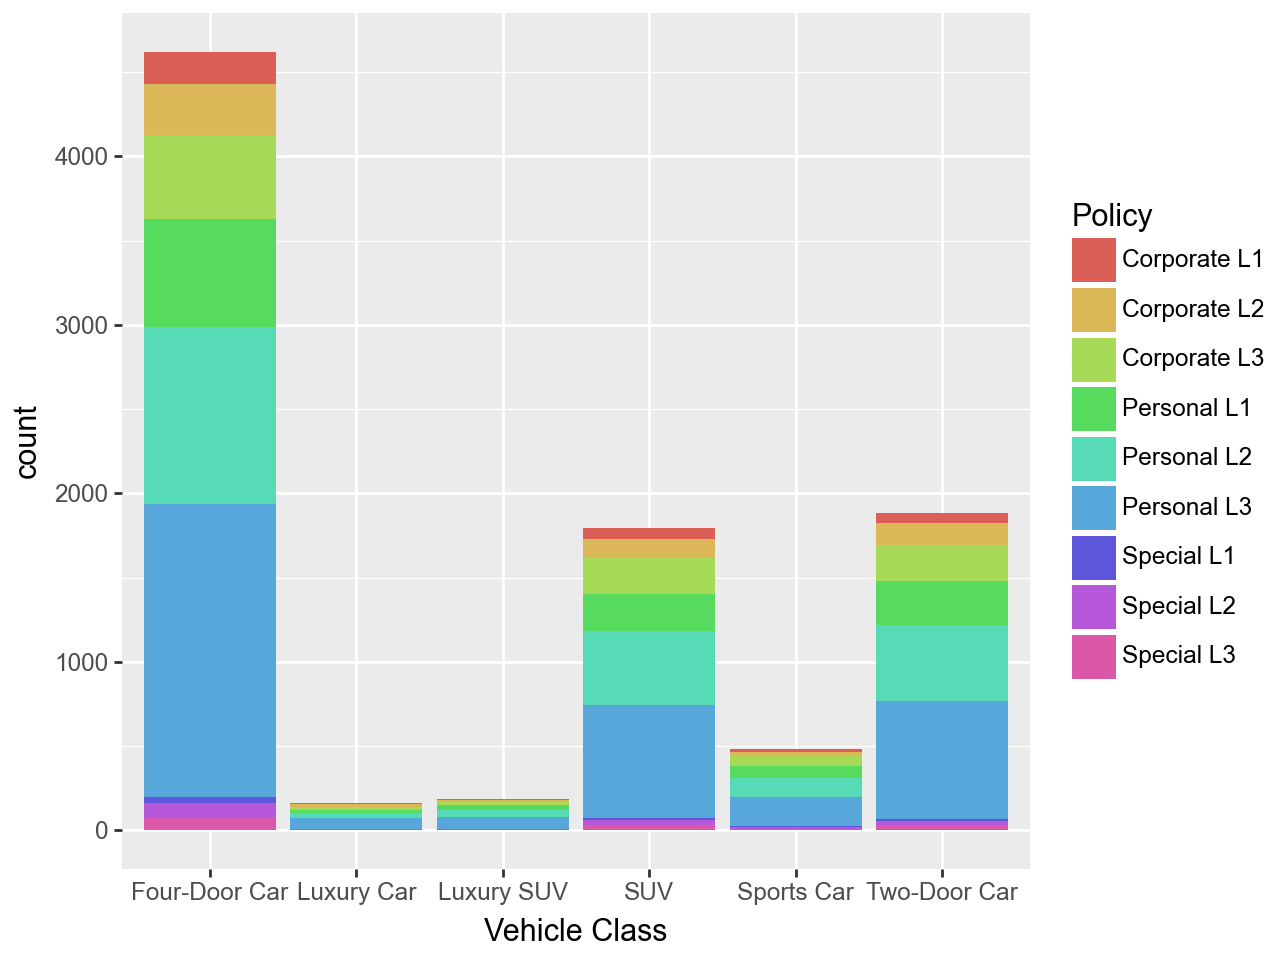

In [112]:
ggplot(aes(x="Vehicle Class", fill="Policy"), customerprime) + geom_bar() 


In [113]:
# customerprime =pd.get_dummies(["State", "Response", "Education", "Employement", "Gender", "Location Code", "Marital Status", "Policy", "Sales Channel", "Vehicle Size"])

In [114]:
from sklearn.preprocessing import OneHotEncoder

In [115]:
enc = OneHotEncoder()
encoded_data = enc.fit_transform(customerprime[["Response", "Education", "Gender", "Location Code", "Marital Status", "Policy", "Sales Channel", "Vehicle Size"]]).toarray()

In [116]:
feature_names = enc.get_feature_names_out().tolist()

In [117]:
encoded_df = pd.DataFrame(encoded_data, columns=feature_names)
customerprime = pd.concat([customerprime, encoded_df], axis=1)

In [118]:
mapa_coverage = {"Basic":1, "Extended":2, "Premium":3}

mapa_policy = {"Corporate L1":2, "Corporate L2":1, "Corporate L3":1,
        "Personal L1":1, "Personal L2":1, "Personal L3":1, 
        "Special L1":1, "Special L2":1, "Special L3":1}

mapa_renew = {"Offer1":2, "Offer2":1, "Offer3":1.5, "Offer4":1}

mapa_vehicle_class = {"Four-Door Car":1, "Luxury Car":3, "Luxury SUV":3, "SUV":2, "Sports Car":2, "Two-Door Car":1}

mapa_employment = {"Disabled":2, "Employed":3, "Medical Leave":1, "Retired":1, "Unemployed":2}

In [119]:
customerprime["vehicle_class_map"] = customerprime["Vehicle Class"].map(mapa_vehicle_class)
customerprime["coverage_map"] = customerprime["Coverage"].map(mapa_coverage)
customerprime["policy_map"] = customerprime["Policy"].map(mapa_policy)
customerprime["renew_offer_type_map"] = customerprime["Renew Offer Type"].map(mapa_renew)
customerprime["employment_status_map"] = customerprime["Employment Status"].map(mapa_employment)

In [120]:
customerprime.drop(["Response", "Education", "Gender", "Location Code", "Marital Status", "Policy", "Sales Channel", "Vehicle Size"], axis = 1, inplace = True)

In [121]:
customerprime.info()
customerprime

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 53 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   Customer                        9134 non-null   object        
 1   State                           9134 non-null   object        
 2   Customer Lifetime Value         9134 non-null   float64       
 3   Coverage                        9134 non-null   object        
 4   Effective To Date               9134 non-null   datetime64[ns]
 5   Employment Status               9134 non-null   object        
 6   Income                          9134 non-null   int64         
 7   Monthly Premium Auto            9134 non-null   int64         
 8   Months Since Last Claim         9134 non-null   int64         
 9   Months Since Policy Inception   9134 non-null   int64         
 10  Number of Open Complaints       9134 non-null   int64         
 11  Numb

Customer       State  Customer Lifetime Value  Coverage  \
0     FQ61281      Oregon                 83325.38  Extended   
1     YC54142  Washington                 74228.52  Extended   
2     BP23267  California                 73225.96  Extended   
3     KH55886      Oregon                 67907.27   Premium   
4     SK66747  Washington                 66025.75     Basic   
...       ...         ...                      ...       ...   
9129  XI84293      Oregon                  1940.98     Basic   
9130  EH70612  California                  1918.12     Basic   
9131  XT54610  California                  1904.00     Basic   
9132  CI68869     Arizona                  1898.68     Basic   
9133  UM17151  California                  1898.01     Basic   

     Effective To Date Employment Status  Income  Monthly Premium Auto  \
0           2011-01-31          Employed   58958                   231   
1           2011-01-26        Unemployed       0                   242   
2           2011-09-02          Employed   39547                   202   
3           2011-05-02          Employed   78310                   192   
4           2011-02-22          Employed   33481                   188   
...                ...               ...     ...                   ...   
9129        2011-07-02        Unemployed       0                    66   
9130        2011-02-15        Unemployed       0                    61   
9131        2011-01-14        Unemployed       0                    63   
9132        2011-08-01        Unemployed       0                    70   
9133        2011-02-26        Unemployed       0                    67   

      Months Since Last Claim  Months Since Policy Inception  \
0                          31                             74   
1                           1                             34   
2                          11                             21   
3                          34                             18   
4                          28                             46   
...                       ...                            ...   
9129                        5                             40   
9130                        2                             54   
9131                       22                              7   
9132                       17                             20   
9133                       15                             91   

      Number of Open Complaints  Number of Policies    Policy Type  \
0                             0                   2  Personal Auto   
1                             0                   2  Personal Auto   
2                             0                   2  Personal Auto   
3                             1                   2  Personal Auto   
4                             0                   2  Personal Auto   
...                         ...                 ...            ...   
9129                          3                   1  Personal Auto   
9130                          2                   1  Personal Auto   
9131                          3                   1  Personal Auto   
9132                          5                   1  Personal Auto   
9133                          3                   1  Personal Auto   

     Renew Offer Type  Total Claim Amount  Vehicle Class  Client Type  \
0              Offer1             1108.80     Luxury Car            0   
1              Offer1             1742.40     Luxury Car            0   
2              Offer1              969.60     Luxury SUV            0   
3              Offer1              151.71     Sports Car            0   
4              Offer1             1194.89     Luxury SUV            0   
...               ...                 ...            ...          ...   
9129           Offer3              475.20   Two-Door Car            1   
9130           Offer1              439.20   Two-Door Car            1   
9131           Offer1              302.40  Four-Door Car            1   
9132   

In [122]:
from pycaret.regression import *

In [123]:
objetivo = 'Customer Lifetime Value'
numericas  = list(customerprime.select_dtypes(include = np.number ).columns.drop(objetivo))
categoricas = list(customerprime.select_dtypes(exclude = 'number').columns)
ignorar = []
print(numericas)
print(categoricas)

['Income', 'Monthly Premium Auto', 'Months Since Last Claim', 'Months Since Policy Inception', 'Number of Open Complaints', 'Number of Policies', 'Total Claim Amount', 'Client Type', 'Response_No', 'Response_Yes', 'Education_Bachelor', 'Education_College', 'Education_Doctor', 'Education_High School or Below', 'Education_Master', 'Gender_F', 'Gender_M', 'Location Code_Rural', 'Location Code_Suburban', 'Location Code_Urban', 'Marital Status_Divorced', 'Marital Status_Married', 'Marital Status_Single', 'Policy_Corporate L1', 'Policy_Corporate L2', 'Policy_Corporate L3', 'Policy_Personal L1', 'Policy_Personal L2', 'Policy_Personal L3', 'Policy_Special L1', 'Policy_Special L2', 'Policy_Special L3', 'Sales Channel_Agent', 'Sales Channel_Branch', 'Sales Channel_Call Center', 'Sales Channel_Web', 'Vehicle Size_Large', 'Vehicle Size_Medsize', 'Vehicle Size_Small', 'vehicle_class_map', 'coverage_map', 'policy_map', 'renew_offer_type_map', 'employment_status_map']
['Customer', 'State', 'Coverage'

In [124]:
exp1 = RegressionExperiment()
exp1.setup(customerprime, ignore_features=ignorar, target=objetivo, 
            session_id=42, train_size=0.7, 
            categorical_features=categoricas, numeric_features=numericas)

In [125]:
top3_exp1 = exp1.compare_models(n_select=1)
top3_exp1

Initiated  . . . . . . . . . . . . . . . . . .              08:09:33
Status     . . . . . . . . . . . . . . . . . .  Loading Dependencies
Estimator  . . . . . . . . . . . . . . . . . .     Compiling Library

ExtraTreesRegressor(n_jobs=-1, random_state=42)

In [126]:
exp1 = RegressionExperiment()
exp1.setup(customerprime[:-1], ignore_features=ignorar, target=objetivo, 
            session_id=42, train_size=0.7, 
            categorical_features=categoricas, numeric_features=numericas)

# get the most successful top 3 models
top3_exp1 = exp1.compare_models(n_select=1)
modelo_final = exp1.create_model(top3_exp1)

In [127]:
# definimos conjuntos de entrenamiento y test
df_train = customerprime[:-1]
df_test = customerprime[-1:]

#n generamos objeto de experimento
exp1 = RegressionExperiment()
exp1.setup(df_train, ignore_features=ignorar, target=objetivo, 
            session_id=42, train_size=0.7, 
            categorical_features=categoricas, numeric_features=numericas)


# seleccionamos el mejor modelo 
top_exp1 = exp1.compare_models(n_select=1)

# entrenamos el modelo 
modelo_final = exp1.create_model(top_exp1)

In [128]:
# guardamos el modelo 
exp1.save_model(modelo_final, 'my_pycaret_regression')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('date_feature_extractor',
                  TransformerWrapper(include=['Effective To Date'],
                                     transformer=ExtractDateTimeFeatures())),
                 ('numerical_imputer',
                  TransformerWrapper(include=['Income', 'Monthly Premium Auto',
                                              'Months Since Last Claim',
                                              'Months Since Policy Inception',
                                              'Number of Open Complaints',
                                              'Number of Policies',
                                              'Total Claim Amount...
                                                                     'Vehicle '
                                                                     'Class'],
                                                               handle_missing='return_nan',
                                    

In [129]:
# cargamos el modelo
my_winning_regressor = load_model('my_pycaret_regression')

Transformation Pipeline and Model Successfully Loaded


In [130]:
setup(data=df_train, target='Customer Lifetime Value')
pred = predict_model(my_winning_regressor, data=df_train)
result = pull()

In [131]:
result

Model        MAE           MSE      RMSE      R2   RMSLE  \
0  Extra Trees Regressor  1256.5663  1.431779e+07  3783.885  0.6967  0.3507   

     MAPE  
0  0.1931